# Import Packages

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from tensorflow.keras import regularizers
from tensorflow.keras import activations
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report


# Load The Dataset

In [2]:
# Read data in the excel file
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# EDA

In [3]:
df.shape


(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:

df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    51.317073
0    48.682927
Name: target, dtype: float64

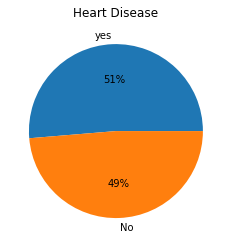

In [9]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

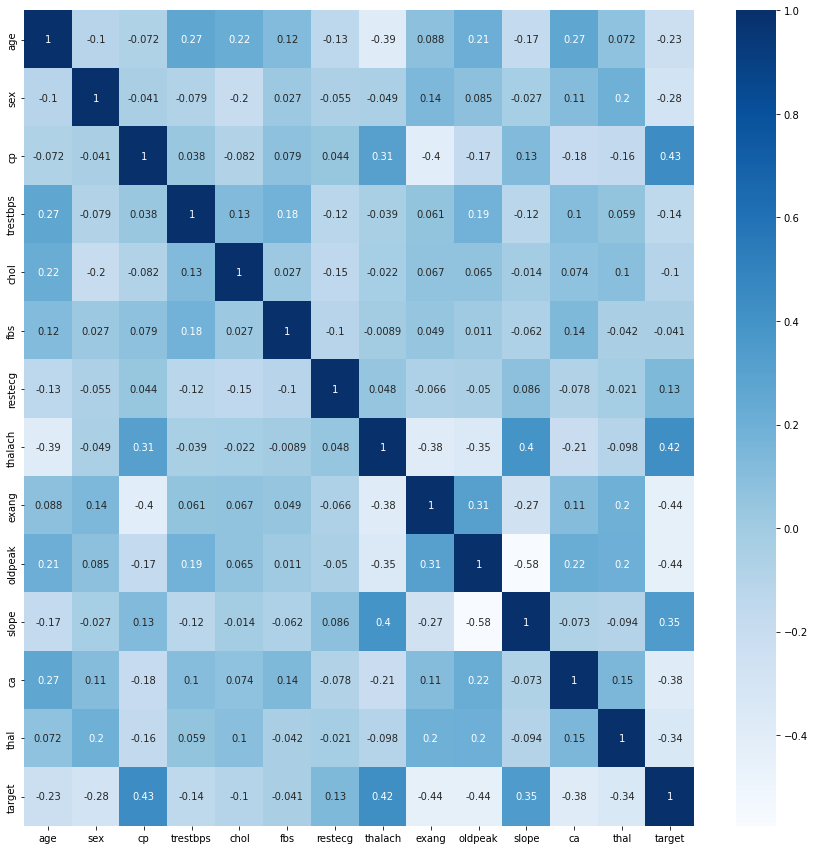

In [10]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

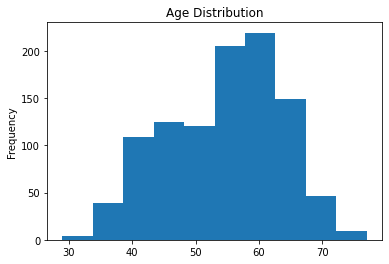

In [11]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [12]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  29
Max age:  77
Average age:  54.43414634146342


C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



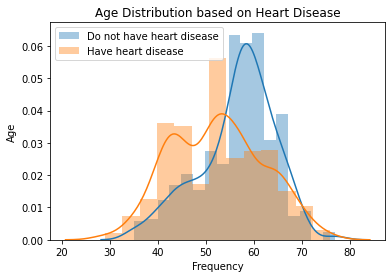

In [13]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['target'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [14]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.569138276553105


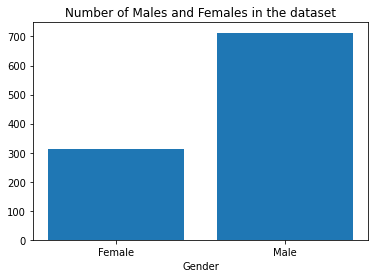

In [15]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

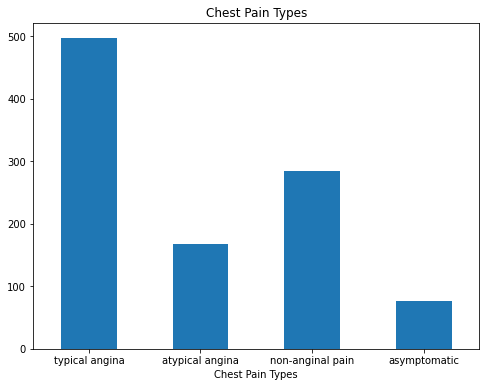

In [16]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

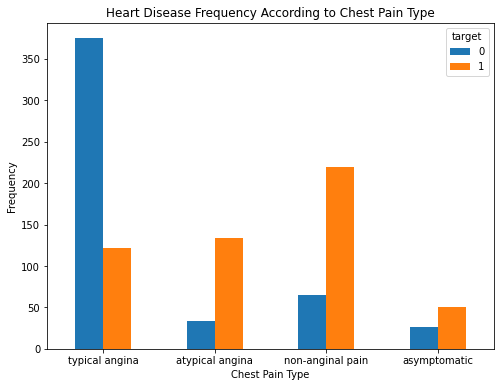

In [17]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

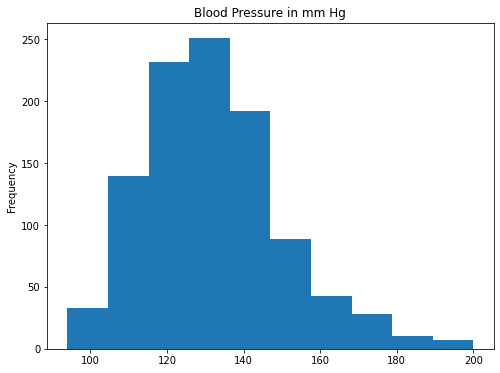

In [18]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



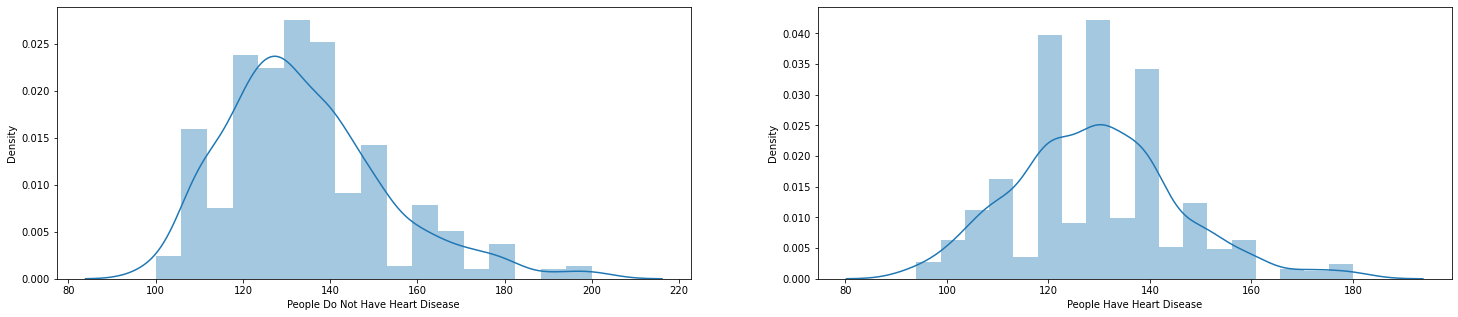

In [19]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [20]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.24524714828897


In [21]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.24524714828897


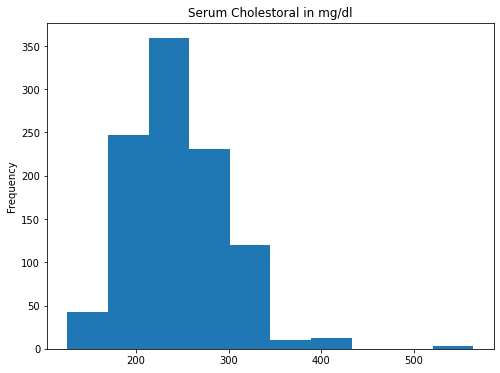

In [22]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



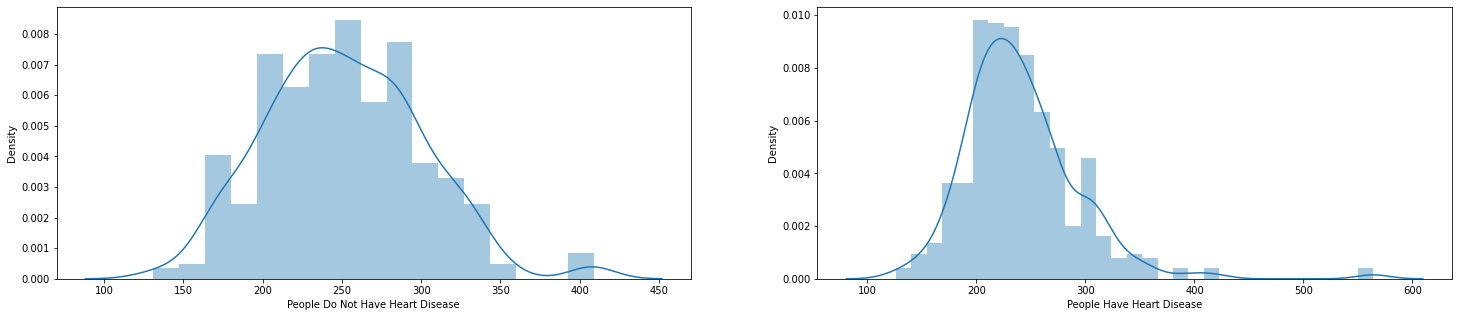

In [23]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [24]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  409
Average cholestoral of people who do not have heart disease:  251.2925851703407


In [25]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', df[df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  240.97908745247148


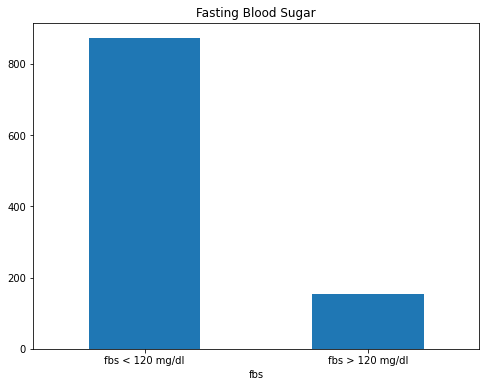

In [26]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

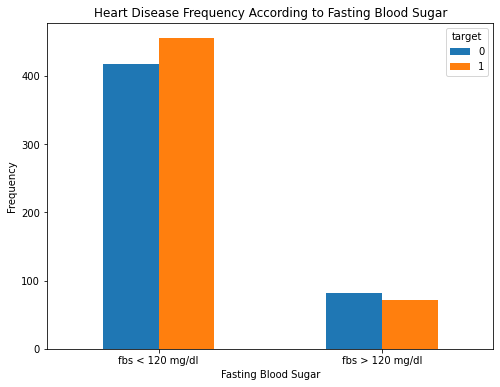

In [27]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

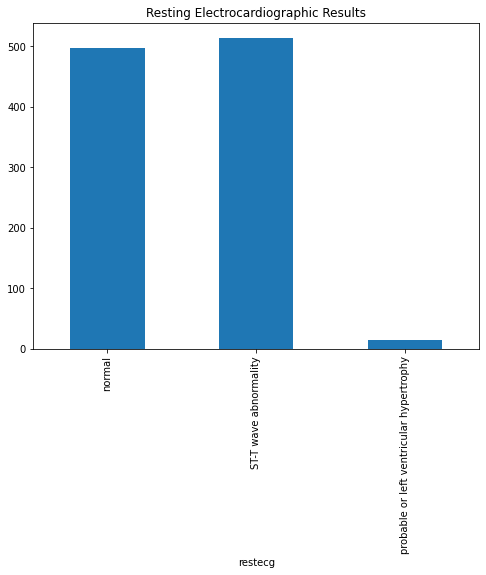

In [28]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

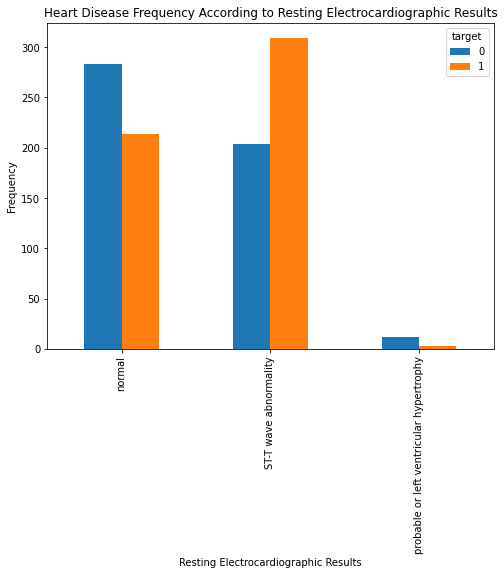

In [29]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

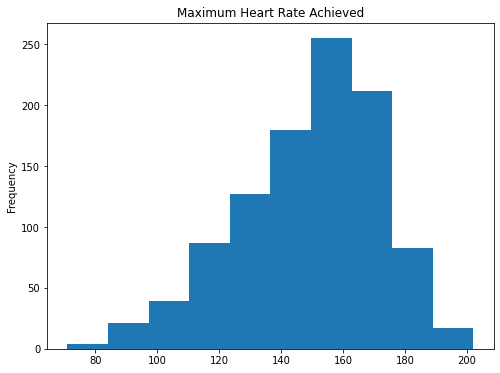

In [30]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\shiny\anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



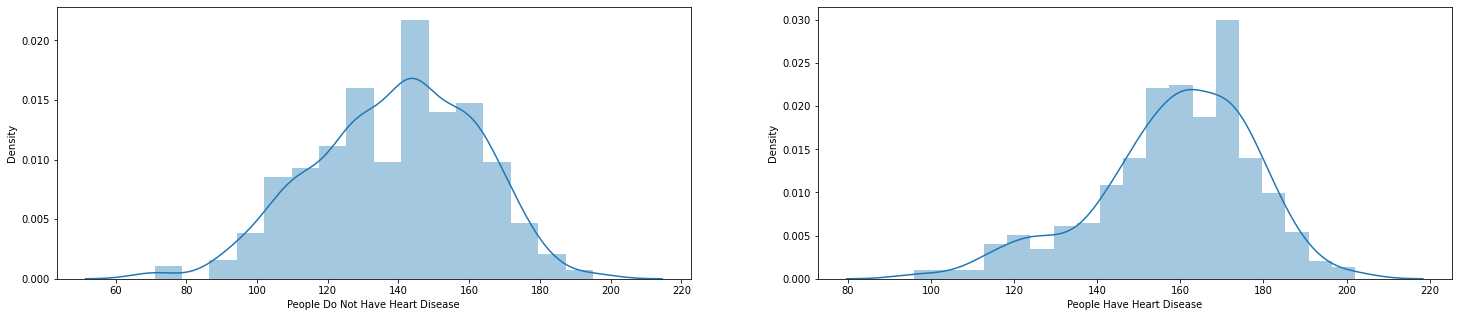

In [31]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

# PreProcessing

In [32]:


scaler = MinMaxScaler()

data = df.drop("target", axis = "columns")
target = df["target"]

data = scaler.fit_transform(data)

# Deep Learning Algorithm


## Proposed CNN+LSTM

In [33]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def matthews_correlation(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())

In [34]:

data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.2,random_state =42)

print (len(data_train))

820


In [35]:
data_train, data_valid, target_train, target_valid = train_test_split(data, target, test_size=0.20, shuffle= True)
print("The shape of X_train is      ", data_train.shape)
print("The shape of X_test is       ",data_test.shape)
print("The shape of y_train is      ",target_train.shape)
print("The shape of y_test is       ",target_test.shape)
print("The shape of Y_valid is      ", target_valid.shape)
print("The shape of X_valid is       ",data_valid.shape)

The shape of X_train is       (820, 13)
The shape of X_test is        (205, 13)
The shape of y_train is       (820,)
The shape of y_test is        (205,)
The shape of Y_valid is       (205,)
The shape of X_valid is        (205, 13)


### Model Creation

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(150, input_shape = (None,820,13), activation = "relu"))#hidden layer with 300 neurons with relu activation15
model.add(keras.layers.Dense(75, activation = "relu")) #hidden layer with 100 neurons with relu activation
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [37]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 820, 150)    2100      
_________________________________________________________________
dense_1 (Dense)              (None, None, 820, 75)     11325     
_________________________________________________________________
dense_2 (Dense)              (None, None, 820, 1)      76        
Total params: 13,501
Trainable params: 13,501
Non-trainable params: 0
_________________________________________________________________


In [38]:
#logs for tensorboard 
root_logdir = os.path.join(os.curdir, "my_logs")
print(os.path)
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()
print(run_logdir)

<module 'ntpath' from 'C:\\Users\\shiny\\anaconda3\\envs\\env\\lib\\ntpath.py'>
.\my_logs\run_2023_08_07-17_22_00


### Model Compilation

In [39]:
#optimizer Adam with particular hyperparameter 
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001)
#compiling model
model.compile(optimizer=optimizer,
             loss = "binary_crossentropy",
             metrics=['accuracy',recall_m,precision_m,f1_m,matthews_correlation])

### Model Training

In [40]:

early_stopping_nn = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_nn = keras.callbacks.TensorBoard( log_dir = run_logdir, histogram_freq=1)
heart_model = model.fit(data_train, target_train, epochs= 50, validation_data = (data_valid,  target_valid), callbacks= [early_stopping_nn, tensorboard_nn])

Epoch 1/50
26/26 [==============================] - 4s 66ms/step - loss: 0.6358 - accuracy: 0.6659 - recall_m: 0.6145 - precision_m: 0.7070 - f1_m: 0.6443 - matthews_correlation: 0.3501 - val_loss: 0.5501 - val_accuracy: 0.8000 - val_recall_m: 0.8622 - val_precision_m: 0.8089 - val_f1_m: 0.8291 - val_matthews_correlation: 0.6148
Epoch 2/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4726 - accuracy: 0.8049 - recall_m: 0.8506 - precision_m: 0.7815 - f1_m: 0.8090 - matthews_correlation: 0.6137 - val_loss: 0.4253 - val_accuracy: 0.8000 - val_recall_m: 0.8203 - val_precision_m: 0.8297 - val_f1_m: 0.8206 - val_matthews_correlation: 0.6142
Epoch 3/50
26/26 [==============================] - 0s 6ms/step - loss: 0.3943 - accuracy: 0.8159 - recall_m: 0.8534 - precision_m: 0.7971 - f1_m: 0.8194 - matthews_correlation: 0.6350 - val_loss: 0.3726 - val_accuracy: 0.8390 - val_recall_m: 0.8697 - val_precision_m: 0.8500 - val_f1_m: 0.8558 - val_matthews_correlation: 0.6837
Epoch 4/5

26/26 [==============================] - 0s 6ms/step - loss: 0.2077 - accuracy: 0.9244 - recall_m: 0.9364 - precision_m: 0.9184 - f1_m: 0.9240 - matthews_correlation: 0.8532 - val_loss: 0.2380 - val_accuracy: 0.9171 - val_recall_m: 0.8985 - val_precision_m: 0.9551 - val_f1_m: 0.9250 - val_matthews_correlation: 0.8502
Epoch 23/50
26/26 [==============================] - 0s 6ms/step - loss: 0.2006 - accuracy: 0.9305 - recall_m: 0.9351 - precision_m: 0.9340 - f1_m: 0.9325 - matthews_correlation: 0.8632 - val_loss: 0.2226 - val_accuracy: 0.9220 - val_recall_m: 0.9242 - val_precision_m: 0.9415 - val_f1_m: 0.9315 - val_matthews_correlation: 0.8584
Epoch 24/50
26/26 [==============================] - 0s 6ms/step - loss: 0.1905 - accuracy: 0.9354 - recall_m: 0.9402 - precision_m: 0.9333 - f1_m: 0.9345 - matthews_correlation: 0.8713 - val_loss: 0.2308 - val_accuracy: 0.8976 - val_recall_m: 0.9596 - val_precision_m: 0.8816 - val_f1_m: 0.9180 - val_matthews_correlation: 0.8137
Epoch 25/50
26/26 [

Epoch 47/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0914 - accuracy: 0.9756 - recall_m: 0.9801 - precision_m: 0.9732 - f1_m: 0.9759 - matthews_correlation: 0.9526 - val_loss: 0.1379 - val_accuracy: 0.9366 - val_recall_m: 0.9163 - val_precision_m: 0.9753 - val_f1_m: 0.9442 - val_matthews_correlation: 0.8853
Epoch 48/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.9720 - recall_m: 0.9637 - precision_m: 0.9764 - f1_m: 0.9686 - matthews_correlation: 0.9447 - val_loss: 0.1165 - val_accuracy: 0.9659 - val_recall_m: 0.9675 - val_precision_m: 0.9770 - val_f1_m: 0.9719 - val_matthews_correlation: 0.9369
Epoch 49/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0868 - accuracy: 0.9744 - recall_m: 0.9769 - precision_m: 0.9750 - f1_m: 0.9748 - matthews_correlation: 0.9504 - val_loss: 0.1149 - val_accuracy: 0.9659 - val_recall_m: 0.9681 - val_precision_m: 0.9770 - val_f1_m: 0.9722 - val_matthews_correlation: 0.9370
Epoch 5

### Model Evaluvation

In [41]:
#evaluating on test dataset
model.evaluate(data_test, target_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9561 - recall_m: 0.9399 - precision_m: 0.9473 - f1_m: 0.9431 - matthews_correlation: 0.8936


[0.11636093258857727,
 0.9560975432395935,
 0.9398809671401978,
 0.9473443031311035,
 0.9430845975875854,
 0.8935895562171936]

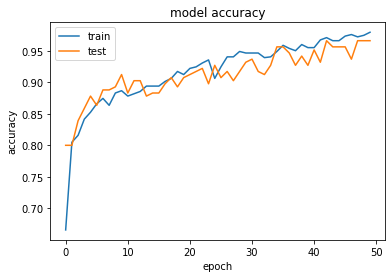

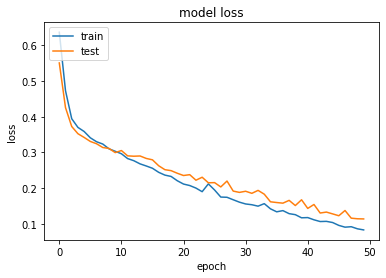

In [42]:

# summarize history for accuracy
plt.plot(heart_model.history['accuracy'])
plt.plot(heart_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(heart_model.history['loss'])
plt.plot(heart_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


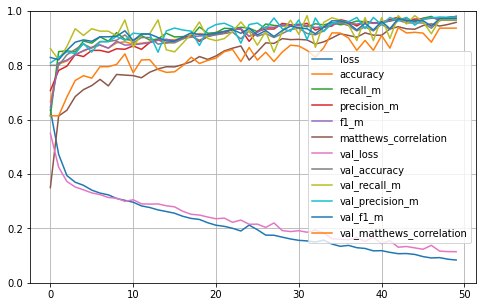

In [43]:
#plot graphs from model history
pd.DataFrame(heart_model.history).plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
#comparing results with predictions
y_predictions = model.predict(data_test).reshape(-1)
print (y_predictions[:5])
y_predictions = np.round(y_predictions)

[9.9931455e-01 9.9985981e-01 8.4701031e-05 9.9971443e-01 1.3846159e-04]


In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


Accuracy = [metrics.accuracy_score(y_predictions, target_test)]
F1_score = [metrics.f1_score(y_predictions, target_test,average='macro')]
Precision = [metrics.precision_score(y_predictions, target_test,average='macro')]
recall = [metrics.recall_score(y_predictions, target_test,average='macro')]
hamming_loss =[metrics.hamming_loss(y_predictions, target_test)] 
confusion = metrics.confusion_matrix(y_predictions, target_test)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
sensitivity = [TP / float(TP+FN)]
specificity=[TN / float(TN+FP)]

In [46]:

pro=[Accuracy,F1_score,Precision,recall,sensitivity,specificity,hamming_loss]
pro_data=pd.DataFrame(pro,index=['Accuracy','F1_score','Precision','recall','sensitivity','specificity','hamming_loss'])

In [47]:
pro_data

,0
Accuracy,0.956098
F1_score,0.956098
Precision,0.956120
recall,0.956120
sensitivity,0.960784
specificity,0.951456
hamming_loss,0.043902


Confusion Matrix


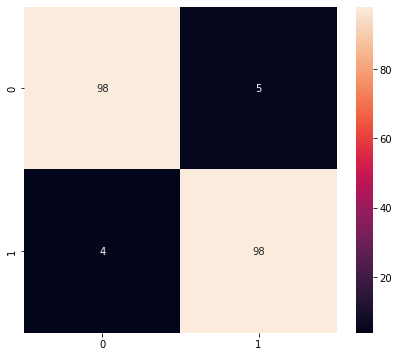

In [48]:
plt.figure(figsize=(7,6))

sns.heatmap(confusion,annot=True,fmt='d')
print('Confusion Matrix')

In [49]:
print ( classification_report(y_predictions, target_test,target_names=['No Disease','Disease']))

              precision    recall  f1-score   support

  No Disease       0.96      0.95      0.96       103
     Disease       0.95      0.96      0.96       102

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



# Algorithm Comparison

In [50]:
import pandas as pd
svc = [0.75,0.77,0.67,0.72]
nb = [0.85,0.88,0.81,0.84]    
xgb = [0.93,0.89,0.80,0.87]
pro = [0.97,0.93,0.99,0.97]

In [51]:
Data1 = zip(svc,nb,xgb,pro)

Data=pd.DataFrame(Data1,index=['Accuracy','Precision','Recall Score','F1-Measure'],columns= ['SVM','Naive Bayes','XGBooster','Enhanced DL Algorithm'])


In [52]:
Data

,SVM,Naive Bayes,XGBooster,Enhanced DL Algorithm
Accuracy,0.75,0.85,0.93,0.97
Precision,0.77,0.88,0.89,0.93
Recall Score,0.67,0.81,0.80,0.99
F1-Measure,0.72,0.84,0.87,0.97


<AxesSubplot:>

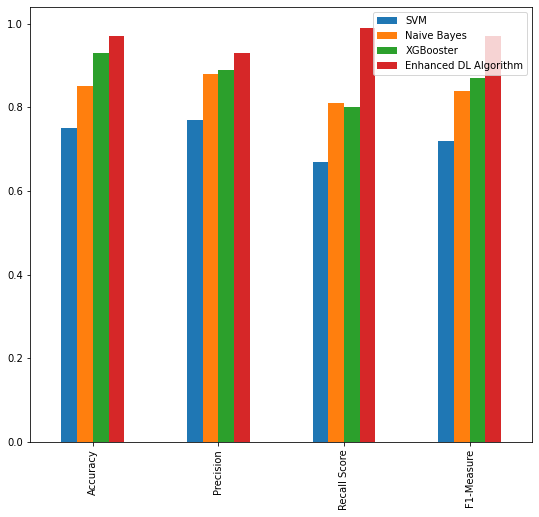

In [53]:
Data.plot(kind="bar", figsize=(9, 8))

# Prediction System

In [54]:
cd flask

D:\heart\saj\flask


In [55]:
# from pathlib import Path

# my_file = Path("app.py")
# if my_file.is_file():
#     !python app.py

<blockquote>CLICK THE FOLLOWING LINK</blockquote>

In [ ]:
import os
from itertools import count
from flask import Flask, render_template ,url_for ,request,Response
import numpy as np
import database
import prediction
import json
import io
import random
import visualization
from pymongo import MongoClient
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import modelbuild


app = Flask ( __name__ )



# @app.route('/plot1.png')
# def plot_png1():
#     fig = visualization.create_figure2(data1)
#     output = io.BytesIO()
#     FigureCanvas(fig).print_png(output)
#     return Response(output.getvalue(), mimetype='image/png')

# @app.route('/plot2.png')
# def plot_png2():
#     fig = visualization.create_figure2(data2)
#     output = io.BytesIO()
#     FigureCanvas(fig).print_png(output)
#     return Response(output.getvalue(), mimetype='image/png')


def create_figure1(data1):
    fig = plt.subplots(figsize =(12, 8))
    barWidth = 0.25
    normal = data1[0]
    user = data1[1]
    br1 = np.arange(len(normal))
    br2 = [x + barWidth for x in br1]
    # br3 = [x + barWidth for x in br2]
    plt.bar(br1, normal, color ='g', width = barWidth,edgecolor ='grey', label ='Normal Value')
    plt.bar(br2, user, color ='r', width = barWidth,edgecolor ='grey', label ="Yours Value")
    # plt.bar(br3, CSE, color ='b', width = barWidth, edgecolor ='grey', label ='CSE')
    plt.xlabel('Health status defining attributes', fontweight ='bold', fontsize = 15)
    plt.ylabel('respective values', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(normal))],['cp','chol','fbs','exang','oldpeak','slope','ca','thal'])
    plt.legend()
    plt.savefig('static/plotng.png') 

def create_figure2(data2):
    fig = plt.subplots(figsize =(12, 8))
    barWidth = 0.25
    normal = data2[0]
    user = data2[1]
    br1 = np.arange(len(normal))
    br2 = [x + barWidth for x in br1]
    plt.bar(br1, normal, color ='g', width = barWidth,edgecolor ='grey', label ='Normal Value')
    plt.bar(br2, user, color ='r', width = barWidth,edgecolor ='grey', label ="Yours Value")
    plt.xlabel('Health status defining attributes', fontweight ='bold', fontsize = 15)
    plt.ylabel('respective values', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(normal))],['trestbps','chol','thalach'])
    plt.legend()
    plt.savefig('static/plotng2.png') 

@app.route('/')
def home():
    global counter2
    counter2+=1
    return render_template('home.html',all_count=counter2)


global counter
counter=0
global counter2
counter2=0

@app.route('/predict',methods=['POST'])
def predict():
    global data1
    global data2
    global counter
    global counter2
    if request.method  == 'POST':
        nameofpatient= request.form ['name']
        age= request.form ['age']
        sex=request.form ['sex']
        cp= request.form ['cp']
        trestbps= request.form ['trestbps']
        chol= request.form ['chol']
        fbs= request.form ['fbs']
        restecg=request.form ['restecg']
        thalach=request.form ['thalach']
        exang=request.form ['exang']
        oldpeak=request.form ['oldpeak']
        slope=request.form ['slope']
        ca=request.form ['ca']
        thal=request.form ['thal']
        counter+=1
        if(counter<=50):
            result=prediction.preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal )
        else:
            #modelbuild.bulidmodel()
            result=prediction.preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal )
            counter=0
        #database.crudOperation(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,result)
        data1,data2=visualization.visualizationpreprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,result)
        create_figure1(data1)
        create_figure2(data2)
        return render_template ('result.html',prediction = result, nameofpatient=nameofpatient, model_counter=counter, total_counter=counter2)

@app.route('/about')
def about():
    return render_template('disease.html')


@app.errorhandler(500)
def internal_error(error):

    return render_template('error.html')


@app.errorhandler(404)
def not_found(error):
    return "404 error",404

if __name__ == '__main__':
   #app.run(port=5000, debug = True)
        app.run(host=os.getenv('IP', '0.0.0.0'), 
            port=int(os.getenv('PORT', 5000)))


C:\Users\shiny\anaconda3\envs\env\lib\site-packages\sklearn\base.py:315: UserWarning:

Trying to unpickle estimator KNeighborsClassifier from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.



 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.68.156:5000/ (Press CTRL+C to quit)
192.168.68.156 - - [07/Aug/2023 17:25:29] "GET / HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:25:32] "GET /static/heartlogo.png HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:25:32] "GET /static/about.jpg HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:25:33] "GET /favicon.ico HTTP/1.1" 404 -


[[-3.19433627e-01 -1.43641607e+00 -9.22748517e-01 -3.98476225e-01
  -4.60558967e+00  5.95335136e+02  9.01639128e-01  7.86012694e-01
   1.40984195e+00 -5.30709195e-02 -2.27916533e+00  1.23743687e+00
   3.33277205e-02]]
0


192.168.68.156 - - [07/Aug/2023 17:31:47] "POST /predict HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:31:47] "GET /static/heartlogo.png HTTP/1.1" 304 -
192.168.68.156 - - [07/Aug/2023 17:31:47] "GET /static/corousal/tenor1.gif HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:31:47] "GET /static/plotng.png HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:31:47] "GET /static/about.jpg HTTP/1.1" 304 -
192.168.68.156 - - [07/Aug/2023 17:31:47] "GET /static/plotng2.png HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:32:38] "GET /about HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:32:38] "GET /static/heartlogo.png HTTP/1.1" 304 -
192.168.68.156 - - [07/Aug/2023 17:32:38] "GET /static/about.jpg HTTP/1.1" 304 -
192.168.68.156 - - [07/Aug/2023 17:32:38] "GET /static/corousal/img5.png HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:32:38] "GET /static/corousal/img6.png HTTP/1.1" 200 -
192.168.68.156 - - [07/Aug/2023 17:32:38] "GET /static/corousal/img4.png HTTP/1.1" 200 -
19